Based on https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

In [267]:
import tensorflow.keras as keras
import tensorflow as tf

# Load data

In [268]:
mnist = tf.keras.datasets.mnist

In [270]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

6


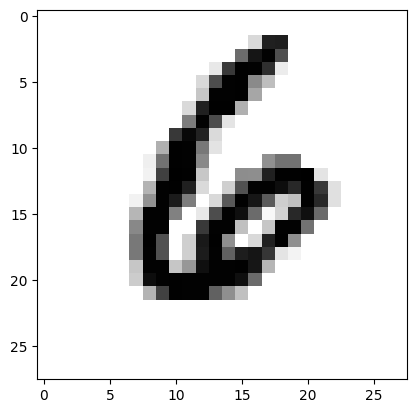

In [274]:
import matplotlib.pyplot as plt

n = 13
print(y_train[n])
plt.imshow(x_train[n],cmap=plt.cm.binary)
plt.show()

### *Optional* normalize step

In [253]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [248]:
import numpy as np
import PIL.Image
import PIL.ImageOps

sets = ['001']
x_personal = []
y_personal = []
for s in sets:
    for d in range(0,10):
        filename = f"./my-digits/{d}-{s}.png"
        print(filename)
        img = PIL.Image.open(filename)
        img = PIL.ImageOps.invert(img.convert('L'))
        img.thumbnail((28, 28))
        aimg = 255 - np.asarray(img, dtype='int32')
        w = aimg.shape[0]
        h = aimg.shape[1]
        aimg = np.pad(aimg, ((14-w//2, 14-w+w//2), (14-h//2, 14-h+h//2)))

        x_personal.append(aimg)
        y_personal.append(d)

./my-digits/0-001.png
./my-digits/1-001.png
./my-digits/2-001.png
./my-digits/3-001.png
./my-digits/4-001.png
./my-digits/5-001.png
./my-digits/6-001.png
./my-digits/7-001.png
./my-digits/8-001.png
./my-digits/9-001.png
10
5
[[  0   0   0   0   0 255 255 255 255 255 249 252 255 255 255 255 255 255
  255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 247 192 147 158 180 189 209 215 214 215
  215 230 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 187  87 131 121 100  85  80  92  91  90
   66 116 246 255 255   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 173 103 234 244 237 235 217 209 210 208
  171 184 252 255 255   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 175 107 245 255 255 255 255 255 255 255
  255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 157  74 238 255 255 255 255 255 255 255
  255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0 255 255 232 108  80 226 252 252 253 255 255 255 255

In [251]:
print(len(y_personal))
n = 5
print(y_personal[n])
print(x_personal[n])
# plt.imshow(x_personal[n], cmap=plt.cm.binary)
# plt.show()

10
5
tf.Tensor(
[[0.         0.         0.         0.         0.         0.18950242
  0.19497544 0.20052277 0.21544357 0.22349195 0.20412093 0.20408346
  0.20609926 0.20622127 0.20677145 0.20708744 0.20693785 0.20712523
  0.20875932 0.20941798 0.22248429 0.2190186  0.19132906 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.18950242
  0.19497544 0.20052277 0.20868455 0.1682763  0.12050512 0.12795709
  0.14548182 0.15284635 0.1694715  0.17460313 0.1736655  0.174635
  0.17601277 0.18888682 0.22248429 0.2190186  0.19132906 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.18950242
  0.19497544 0.20052277 0.15799195 0.0762502  0.10738892 0.09799245
  0.08082324 0.06874042 0.06486947 0.0747139  0.07384841 0.07310302
  0.05403183 0.09526465 0.21463192 0.2190186  0.19132906 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.     

In [249]:
x_personal = tf.keras.utils.normalize(x_personal, axis=1)
x_personal = tf.keras.utils.normalize(x_personal, axis=1)

In [250]:
y_personal

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [227]:
print(len(x_train), len(y_train))
x_train = np.concatenate((x_train, np.array(x_personal)))
y_train = np.concatenate((y_train, np.array(y_personal)))
print(len(x_train), len(y_train))

60000 60000
60010 60010


In [220]:
# Just some numpy arrays tests

# a = np.array([[
#     [1.1, 1.2],
#     [2.2, 2.2]
# ]])
a = np.empty((1,2,2))
# a = np.array([], ndmin=3)

# cannot reshape array of size 0 into shape (1,2,2)
# a = np.array([])
# a.shape = (1, 2, 2)
# print(a)

np.insert(a, 1, [
    [3.1, 3.2],
    [4.1, 4.2]
], axis=0)


array([[[0.0e+000, 0.0e+000],
        [2.5e-323, 2.5e-323]],

       [[3.1e+000, 3.2e+000],
        [4.1e+000, 4.2e+000]]])

# Train!

In [279]:
model = tf.keras.models.Sequential()

# input layer
model.add(tf.keras.layers.Flatten())

# two hidden dense layers 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# output layer:
model.add(tf.keras.layers.Dense(10, 'softmax')) 
# In original article it was activation=tf.nn.softmax causes an error while loading model:
# Exception encountered: Could not interpret activation function identifier: {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8214 - loss: 4.0275
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9198 - loss: 0.3514
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9399 - loss: 0.2349


In [280]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9364 - loss: 0.2456
0.21389652788639069
0.9452000260353088


In [281]:
model.save('./mnist-test1.keras')

---

# Predictions!

In [284]:
new_model = tf.keras.models.load_model('./mnist-test1.keras')

In [296]:
predictions = np.array(new_model.predict(x_test))
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[1.8033859e-15 1.4734283e-11 6.7062319e-12 ... 9.9999005e-01
  5.8886832e-12 3.4944506e-08]
 [2.8200147e-13 2.9453791e-09 9.9999994e-01 ... 2.1021146e-13
  1.2769647e-11 1.6848257e-18]
 [1.6354781e-12 9.9999219e-01 3.1305337e-06 ... 4.3353125e-06
  3.4977390e-08 3.0378260e-09]
 ...
 [4.7697291e-10 1.9769549e-14 4.4675968e-13 ... 1.6612622e-09
  2.6876489e-08 1.0846112e-05]
 [1.5543555e-04 4.0986552e-15 1.2161887e-11 ... 1.0181475e-09
  8.5401192e-02 3.9198592e-11]
 [6.3726087e-09 6.0562527e-11 8.6486824e-07 ... 5.3356231e-10
  1.0241324e-09 1.9553321e-11]]


predicted: 5, actual: 5


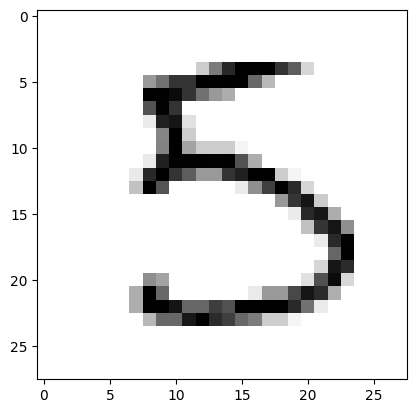

In [299]:
import numpy as np

n = 15
print(f"predicted: {np.argmax(predictions[n])}, actual: {y_test[n]}")
# print(x_test[n])
plt.imshow(x_test[n],cmap=plt.cm.binary)
plt.show()